In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

from outcome_adaptive_lasso import calc_outcome_adaptive_lasso, generate_synthetic_dataset, calc_ate_vanilla_ipw

warnings.filterwarnings(action='ignore') # ignore sklearn's ConvergenceWarning

res_dict = defaultdict(list)  # {'sample_id': [], 'number_samples': [], 'method': [], 'error': []}
for rep in range(1000):
    df = generate_synthetic_dataset(n=200, d=100, rho=0, eta=0, scenario_num=4)
    ate_oal = calc_outcome_adaptive_lasso(df['A'], df['Y'], df[[col for col in df if col.startswith('X')]])
    ate_conf = calc_ate_vanilla_ipw(df['A'], df['Y'], df[[col for col in df if col.startswith('Xc')]])
    ate_targ = calc_ate_vanilla_ipw(df['A'], df['Y'], df[[col for col in df if col.startswith('Xc')] +
                                                             [col for col in df if col.startswith('Xp')]])
    ate_pot_conf = calc_ate_vanilla_ipw(df['A'], df['Y'], df[[col for col in df if col.startswith('Xc')] +
                                                             [col for col in df if col.startswith('Xp')] +
                                                             [col for col in df if col.startswith('Xi')]])
    res_dict['ate'].extend([ate_oal, ate_conf, ate_targ, ate_pot_conf])
    res_dict['method'].extend(['OAL', 'Conf', 'Targ', 'PotConf'])
    res_dict['rep'].extend(4*[rep])

df_res = pd.DataFrame(res_dict)
df_res.head(4)

,ate,method,rep
0,0.160082,OAL,0
1,0.549702,Conf,0
2,0.098113,Targ,0
3,0.101669,PotConf,0


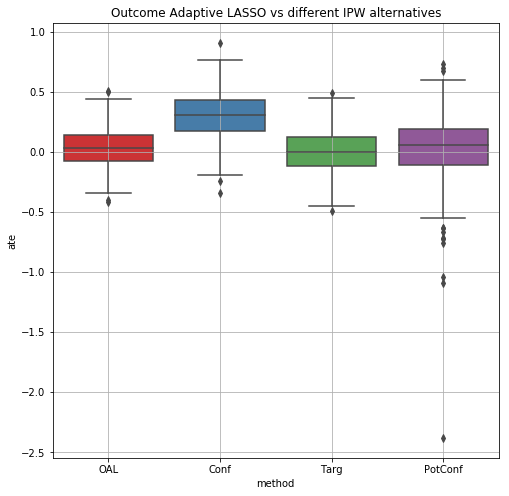

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.boxplot(x='method', y='ate', data=df_res, ax=ax, palette=sns.color_palette("Set1"));
ax.grid()
ax.set_title('Outcome Adaptive LASSO vs different IPW alternatives');
fig.savefig("compare_oal_ipw_output", dpi=300)